In [ ]:
!pip3 install Distance
!pip3 install fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output #Unknown
%matplotlib inline 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import os
import datetime as dt
import gc #Garbage Collection
import re
from nltk.corpus import stopwords
import distance 
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from os import path
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
STOP_WORDS = stopwords.words('english')
from sklearn.manifold import TSNE
from PIL import Image 
from fuzzywuzzy import fuzz
import time 
import warnings 
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys #Works with parameter
from tqdm import tqdm
import spacy #Works with different languages
import sqlite3
from sqlalchemy import create_engine
from sklearn.decomposition import TruncatedSVD #Use for dimension reduction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter #Uses for value count
from scipy.sparse import hstack #Uses to join multiple matrics
from sklearn.multiclass import OneVsRestClassifier #predict class
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

     |████████████████████████████████| 184kB 5.1MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=5c87ecce2b72938899db362ee7177a0e8ff19681a089f129aeacd9aa7d4c16a6
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   qid1          100000 non-null  int64 
 2   qid2          100000 non-null  int64 
 3   question1     100000 non-null  object
 4   question2     100000 non-null  object
 5   is_duplicate  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ MB
~> Total number of question pairs for training:
   100000
~> Question pairs are not Similar (is_duplicate = 0):
   62.75%

~> Question pairs are Similar (is_duplicate = 1):
   37.25%


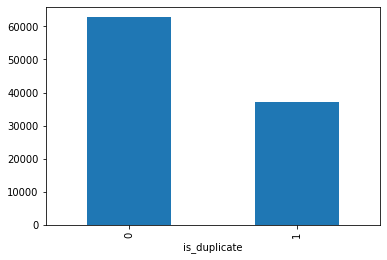

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/Real World Problem-1/train.csv')

df = df.head(100000)

df.info()

df.groupby("is_duplicate")['id'].count().plot.bar()
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

In [ ]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

Total number of  Unique Questions are: 165931

Number of unique questions that appear more than one time: 19446 (11.719329118730075%)

Max number of times a single question is repeated: 32



In [ ]:
q_vals=qids.value_counts()

q_vals=q_vals.values

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

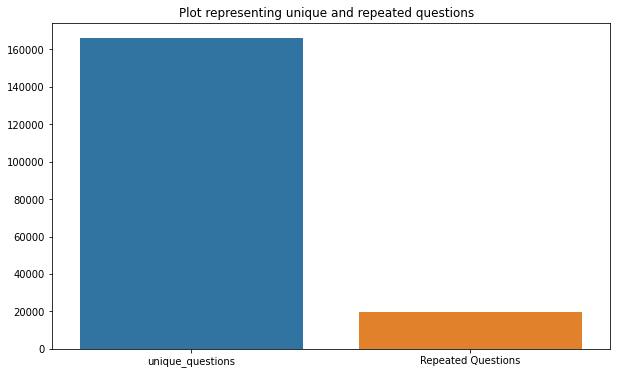

In [ ]:
plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [ ]:
pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

#We are using reset_index to create dataframe with removing duplicate index.

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2))) #2 means decimal place
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Number of duplicate questions 0
~> Question pairs are not Similar (is_duplicate = 0):
   62.75%

~> Question pairs are Similar (is_duplicate = 1):
   37.25%


Maximum number of times a single question is repeated: 32



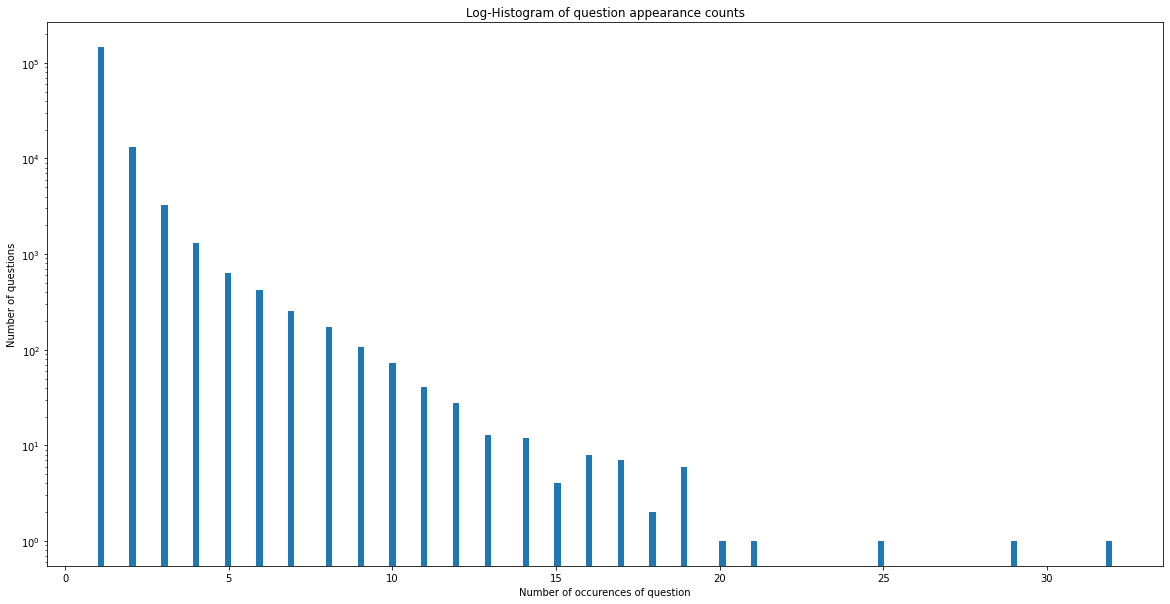

In [ ]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [ ]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [ ]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [ ]:
#To create some features without preprocessing data

df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)
def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


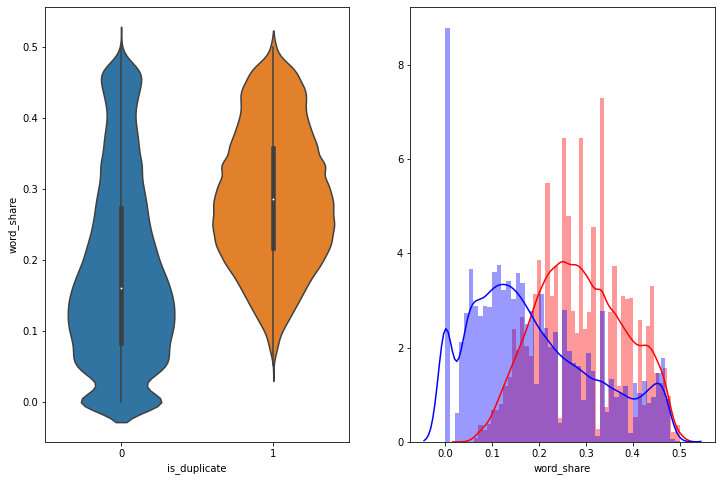

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

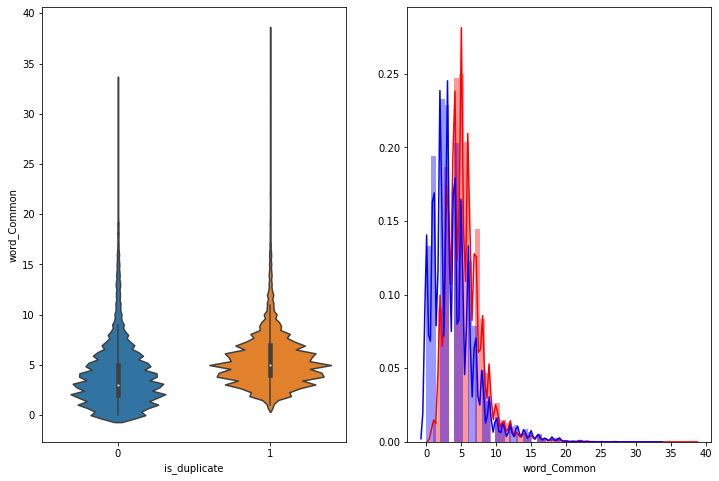

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))
print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))
print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 15
Number of Questions with minimum length [question2] : 5


In [ ]:
#Function for preprocessing data

SAFE_DIV = 0.0001 # decimal place
STOP_WORDS = stopwords.words("english")
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    porter = PorterStemmer() # Convert all similar words to theri ideal word 
    pattern = re.compile('\W') #Find white space
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x) # Remove all html tags
        x = example1.get_text()
               
    return x

In [ ]:
#Funtion to create features with preprocessing data

def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features


In [ ]:
#Funtion to create features with preprocessing data and to preprocess data...

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   

    print("fuzzy features..")
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [ ]:
#We are calling function to create features...

if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("/content/drive/My Drive/Machine Learning/Real World Problem-1/train.csv")
    df = df.head(100000)
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [ ]:
#......np.dstack.......
#a = np.array((1,2,3))
#b = np.array((2,3,4))
#np.dstack((a,b))
#array([[[1, 2],
#        [2, 3],
#        [3, 4]]])


#........flatten().......
#y = np.array([[2,3], [4,5]])
#y.flatten()
#array([2, 3, 4, 5])

df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 74508
Number of data points in class 0 (non duplicate pairs) : 125492


In [ ]:
# Creating word colud...

d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
stopwords.remove("like")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 4021637
Total number of words in non duplicate pair questions : 8150007


Word Cloud for Duplicate Question pairs


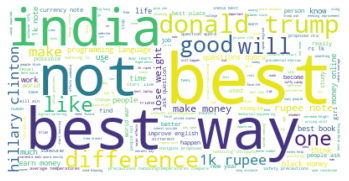

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Worzd Cloud for non-Duplicate Question pairs:


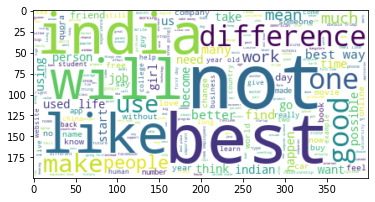

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
wc.generate(textn_w)
print ("Worzd Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("on")
plt.show()

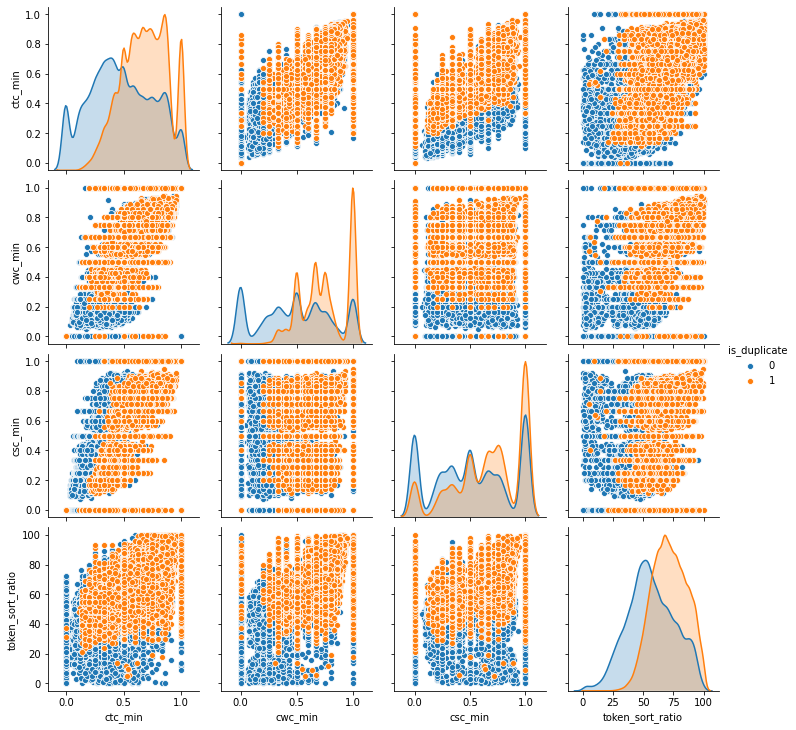

In [ ]:
#We are seeing best pair features...

n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

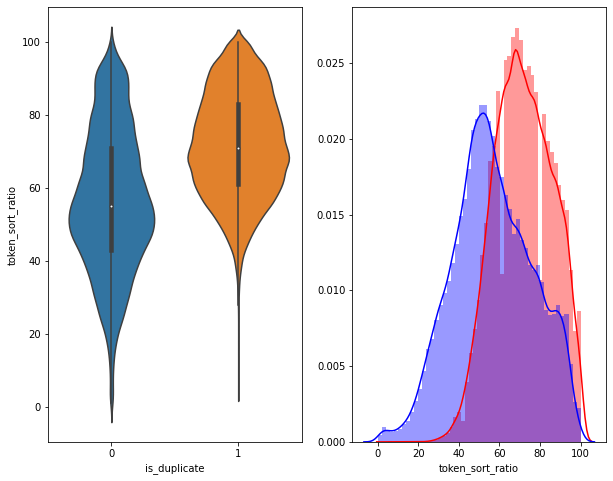

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

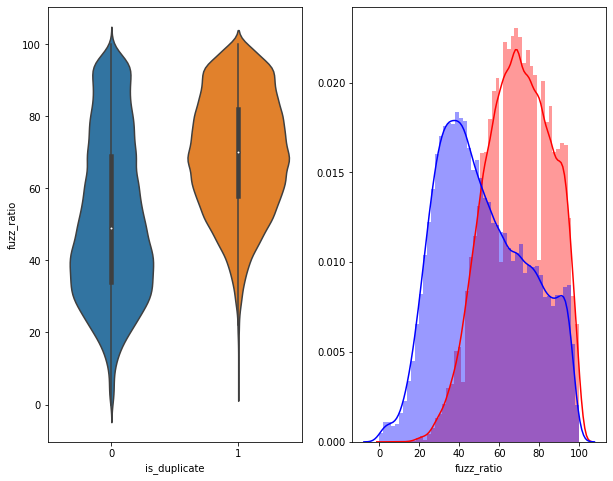

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [ ]:
# Separating features and output class to make tsne...

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.022s...
[t-SNE] Computed neighbors for 5000 samples in 0.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.312s
[t-SNE] Iteration 50: error = 81.3346405, gradient norm = 0.0466835 (50 iterations in 2.414s)
[t-SNE] Iteration 100: error = 70.6411362, gradient norm = 0.0087385 (50 iterations in 1.759s)
[t-SNE] Iteration 150: error = 68.9421158, gradient norm = 0.0055224 (50 iterations in 1.718s)
[t-SNE] Iteration 200: error = 68.1217880, gradient norm = 0.0044136 (50 iterations in 1.721s)
[t-SNE] Iteration 250: error = 67.6154175, gradient norm = 0.0040027

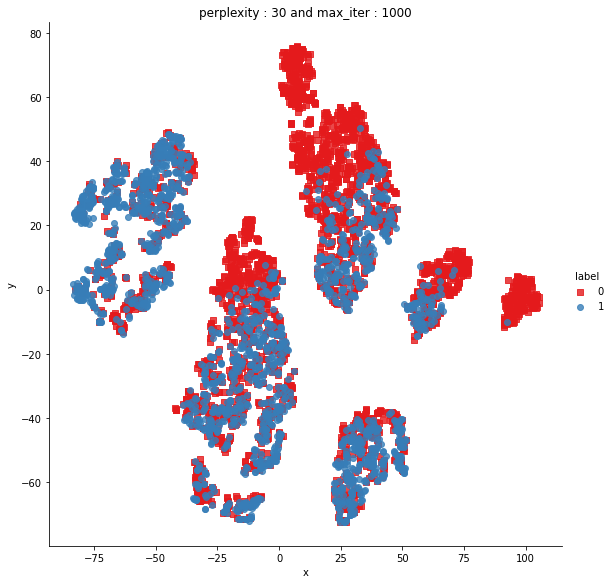

In [ ]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/Real World Problem-1/train.csv')
df = df.head(100000)
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [ ]:
#Crating matrix of words
questions = list(df['question1']) + list(df['question2'])
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
#Creating tfidf_w2v for q1
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

vecs1 = []

for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)


100%|██████████| 100000/100000 [15:33<00:00, 107.18it/s]


In [ ]:
#Creating tfidf_w2v for q2

vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        vec2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
        except:

            idf = 0
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 100000/100000 [14:57<00:00, 111.42it/s]


In [ ]:
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("Empty")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("Empty")

In [ ]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [ ]:
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [ ]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


In [ ]:
df3.head()

,id,q1_feats_m,q2_feats_m
0,0,"[-6.121420621871948, 38.222422271966934, -67.9...","[-14.39452612400055, 60.30730018019676, -53.48..."
1,1,"[9.795048892498016, -77.91325789690018, -46.05...","[-2.7331142276525497, -14.79659914970398, -130..."
2,2,"[97.834632396698, 22.977531492710114, -40.1156...","[157.52949585020542, 59.357513666152954, -8.62..."
3,3,"[57.273059606552124, -21.757192075252533, -4.5...","[41.6716103553772, 56.81133171916008, 31.08053..."
4,4,"[81.29870414733887, -37.346323013305664, -82.5...","[-14.316510200500488, -4.397057980298996, -69...."


In [ ]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-6.121421,38.222422,-67.949496,32.129610,143.528017,135.756383,17.422473,54.835071,81.021254,234.277917,26.688355,-6.079366,42.193358,-103.921236,-6.730236,-94.220281,-31.365315,-29.127104,-39.658274,30.085985,67.618180,57.181553,7.537443,21.091686,-56.784237,-40.803678,30.842825,-20.829660,93.877028,-108.607439,135.101581,-69.778336,58.778938,-95.048486,-34.092811,-87.744963,198.106179,-57.094744,-33.009103,-69.100980,...,114.848363,50.302081,-57.581557,106.943650,98.641737,-67.552682,89.150419,48.177571,-12.881141,-108.365389,77.797929,-76.959483,-55.652902,55.622657,-134.872986,15.617513,-14.962096,-43.185179,-71.346007,67.101838,139.119006,-134.751132,11.143243,11.572522,23.414213,-83.454036,-55.992328,-21.674165,7.090571,-15.598249,-72.398249,-60.091308,-22.364754,103.567410,-68.078978,-54.942036,-68.028957,116.618413,60.722554,-12.581707
1,9.795049,-77.913258,-46.058619,77.030854,180.451564,99.164034,74.614531,47.918875,126.147054,112.669439,72.125856,-45.535595,30.756469,-76.947443,-101.602170,-78.173126,13.280342,71.259267,-3.232596,-59.026599,2.493985,-45.708812,-14.134566,-107.352088,-91.806996,-84.613858,24.506238,-122.847608,52.419865,-116.614105,-19.788497,4.550546,36.249915,-31.566837,54.892981,-143.290166,186.567078,-50.386952,-102.094724,-61.427810,...,67.680813,119.811293,3.119504,-50.384597,-76.302107,-42.686025,-2.594559,25.624217,72.463204,52.830801,54.786557,-27.633803,-60.974654,66.611905,-126.015709,4.954107,51.668157,4.850083,-50.196882,-21.378418,148.052055,-19.738715,-45.798728,-13.114479,102.834059,-82.234313,-12.100017,25.704827,14.859213,134.666587,-32.527917,-94.174808,17.838226,-18.122372,-77.300852,78.912388,39.327989,128.021789,113.357456,5.068141
2,97.834632,22.977531,-40.115691,19.027917,57.128925,48.643048,8.824565,36.712385,107.207593,227.200495,-5.047449,-68.044779,-53.104788,-113.113237,49.674026,4.005536,-23.473380,3.998356,-19.261875,-52.465475,60.335235,103.131865,-6.163986,-48.051731,-51.536159,26.135174,-72.006718,-82.877165,61.856432,-59.801684,85.476181,96.006627,-9.713267,-44.516031,-26.648794,-8.685585,67.508993,-86.355873,-137.736702,-58.986338,...,127.220427,33.295548,11.835342,33.402561,128.295713,-117.555024,-54.065405,116.797753,-7.334228,-28.575611,22.223329,-95.966027,-13.829066,68.313581,-19.851037,-0.298040,63.275597,21.714221,-36.574922,7.950957,101.794753,-90.350076,-11.860861,-20.411354,16.955008,9.584681,-78.455127,78.058240,59.287946,-78.985676,-67.050986,87.915446,4.005962,57.169643,-43.610037,-57.861145,-50.554416,78.921571,106.470328,-33.153310
3,57.273060,-21.757192,-4.586365,-88.879064,-4.680804,-53.877732,74.315676,106.372016,15.578686,39.082011,-100.810188,-12.370911,147.794956,101.245117,61.789931,147.370895,-76.271931,-61.161075,-63.313839,8.337216,-32.468276,-6.439366,-28.079291,-32.347797,25.219227,125.013148,5.799405,-110.922003,-10.131525,-23.386472,-37.748863,-18.704936,38.721987,-52.118862,-13.933459,-56.622945,19.350671,-96.035168,-86.070409,18.110562,...,99.029236,22.074960,-17.892776,20.433882,17.883648,-152.339933,-27.403510,2.300205,9.219996,-13.939324,-97.035774,11.593833,71.034060,20.657476,-23.227574,-17.368009,48.043983,30.730437,-6.077769,-98.845886,124.954342,-17.222775,-42.855922,78.760513,38.016876,-85.687404,-23.571345,54.996005,-13.766733,-25.029633,28.158707,41.933230,-11.158599,16.862169,-36.354113,8.844244,-64.584638,94.708223,-34.201103,70.475892
4,81.298704,-37.346323,-82.515099,-53.991002,77.616583,-19.254373,53.355211,94.214313,157.222025,286.589087,48.240332,27.492927,156.266718,-71.758472,61.489715,50.926288,-80.719206,-35.521457,-51.860129,-51.177472,122.463918,5.029307,-58.988454,-16.092163,-88.833130,21.229257,6.688693,-161.582023,158.335703,-89.102927,64.689386,82.462686,52.909358,-56.845391

In [ ]:
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-14.394526,60.307300,-53.488205,19.574277,114.510002,102.330500,8.303557,66.327249,32.834468,212.127871,-14.637858,5.785576,41.115689,-96.150394,-1.201682,-67.060215,-30.985404,-17.991928,-30.199099,32.804754,65.871531,55.349525,1.689497,28.050613,-46.292604,-25.439479,51.436526,-21.018560,98.813751,-96.312039,127.572181,-28.440770,83.198923,-92.260681,-24.670640,-67.969941,172.408244,-62.860947,-22.803829,-60.678839,...,121.147281,26.503651,-50.615232,114.875515,100.348439,-73.137228,85.831828,42.523480,-18.061020,-104.068074,68.603542,-46.827417,-60.490497,47.480386,-114.543324,10.081843,-0.006157,-29.935503,-78.718237,77.663972,131.607139,-124.488726,20.674477,20.564588,38.260456,-85.295195,-62.171492,3.870496,-58.524745,-49.923776,-72.799442,-37.188711,-31.594729,94.054989,-44.954650,-34.425985,-76.681988,100.020355,51.087632,-17.578252
1,-2.733114,-14.796599,-130.163373,-2.371492,75.828710,21.752939,78.680079,83.948890,127.084074,278.071658,49.933267,-46.993772,122.676777,-104.827614,-33.828051,-118.489243,21.638550,77.371466,-30.135920,-84.330934,-73.954024,-9.070705,-53.341896,-78.922384,-121.158650,-22.790142,36.651580,-117.629914,94.522638,-171.095335,71.641008,53.430730,-4.580017,-87.083662,-1.807805,-167.206913,237.755697,-106.079788,-117.191764,-80.653847,...,187.507889,110.543599,-78.707805,-63.939810,-67.636493,-111.006456,18.458291,15.690177,40.686999,28.669540,50.152099,-26.385639,-52.235148,97.969720,-70.567021,87.586529,2.411539,-13.054510,-49.612677,18.940904,177.965921,-79.847110,-48.991425,-2.944158,11.592329,-202.937810,-45.946054,86.115315,3.400021,-5.759127,6.697536,-61.947973,-16.434157,-0.969422,26.923889,167.606624,-58.789940,191.880404,124.096609,56.469815
2,157.529496,59.357514,-8.621732,30.037216,135.440024,114.783845,90.417719,21.224072,24.730439,172.946172,-105.482728,-27.518655,-45.493437,-97.030763,-12.890249,43.284143,21.493206,15.622359,0.384816,-28.104940,-12.546785,10.989037,-52.216550,-4.209195,8.182671,21.238622,-36.991263,-14.569894,44.373258,-108.429517,126.593716,-1.950613,40.278351,-51.539488,38.973661,-80.155220,125.101873,-68.040107,-108.226800,-19.485651,...,12.871064,-63.156844,40.324732,37.587733,110.141158,-75.780634,-13.420399,39.411960,-48.972953,-144.628496,12.064727,-55.349134,-61.050357,103.164083,3.274048,-21.982297,37.950269,-25.486249,23.322972,9.717669,155.013833,-76.564125,-21.054121,-27.856106,12.593904,-21.454530,-48.329293,41.992756,50.227467,-59.536082,-27.056525,-19.968447,75.536468,23.107774,-93.413451,-179.347486,-92.023859,20.631151,22.725393,50.189360
3,41.671610,56.811332,31.080533,-5.267434,33.538869,78.780954,16.288073,38.832174,21.406395,102.313824,-70.768122,-62.027203,-22.063565,-53.873332,-6.017938,22.839275,-39.322299,-6.884778,11.224049,12.869011,33.417833,-37.417451,-20.018851,-6.132365,-32.374810,30.311008,-42.339951,-63.326149,37.120349,2.299514,-9.587973,64.096037,33.306167,-22.282657,-14.775134,0.202910,61.055412,-50.585495,-81.389398,-43.399528,...,42.651333,9.734796,15.612822,30.762857,41.533466,-100.814729,31.678418,-34.203545,-67.824523,-21.727375,20.615321,19.064211,-1.567686,47.597399,15.412518,82.569242,59.056976,-35.727499,30.220545,-1.136298,47.737207,-54.223374,-25.461400,-7.092451,-48.380258,-34.501868,24.603749,81.564173,-27.351161,-64.410726,-17.881389,30.244598,49.488504,27.487159,24.928985,-32.876769,-3.364811,-14.172287,5.179320,7.419281
4,-14.316510,-4.397058,-69.656946,-48.929358,18.462363,-50.906910,24.488535,60.127120,31.991284,56.552280,-39.902875,-1.414661,102.628442,-60.213173,9.192769,27.863959,11.617887,-43.755433,-43.588022,48.974844,18.555665,29.668302,-19.126864,3.591968,-41.133152,6.918997,46.765355,-32.662241,52.254173,-32.925691,72.816423,12.703060,34.706740,-44.237947,-2.176834,-68

In [ ]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 221


In [ ]:
#Creating final features...

if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

In [ ]:
my_final_feature = pd.read_csv('/content/final_features.csv')
my_final_feature.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,-6.121421,38.222422,-67.949496,32.129610,143.528017,135.756383,17.422473,54.835071,81.021254,234.277917,26.688355,...,121.147281,26.503651,-50.615232,114.875515,100.348439,-73.137228,85.831828,42.523480,-18.061020,-104.068074,68.603542,-46.827417,-60.490497,47.480386,-114.543324,10.081843,-0.006157,-29.935503,-78.718237,77.663972,131.607139,-124.488726,20.674477,20.564588,38.260456,-85.295195,-62.171492,3.870496,-58.524745,-49.923776,-72.799442,-37.188711,-31.594729,94.054989,-44.954650,-34.425985,-76.681988,100.020355,51.087632,-17.578252
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,1,1,51,88,8,13,4.0,20.0,0.200000,2,0,9.795049,-77.913258,-46.058619,77.030854,180.451564,99.164034,74.614531,47.918875,126.147054,112.669439,72.125856,...,187.507889,110.543599,-78.707805,-63.939810,-67.636493,-111.006456,18.458291,15.690177,40.686999,28.669540,50.152099,-26.385639,-52.235148,97.969720,-70.567021,87.586529,2.411539,-13.054510,-49.612677,18.940904,177.965921,-79.847110,-48.991425,-2.944158,11.592329,-202.937810,-45.946054,86.115315,3.400021,-5.759127,6.697536,-61.947973,-16.434157,-0.969422,26.923889,167.606624,-58.789940,191.880404,124.096609,56.469815
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,97.834632,22.977531,-40.115691,19.027917,57.128925,48.643048,8.824565,36.712385,107.207593,227.200495,-5.047449,...,12.871064,-63.156844,40.324732,37.587733,110.141158,-75.780634,-13.420399,39.411960,-48.972953,-144.628496,12.064727,-55.349134,-61.050357,103.164083,3.274048,-21.982297,37.950269,-25.486249,23.322972,9.717669,155.013833,-76.564125,-21.054121,-27.856106,12.593904,-21.454530,-48.329293,41.992756,50.227467,-59.536082,-27.056525,-19.968447,75.536468,23.107774,-93.413451,-179.347486,-92.023859,20.631151,22.725393,50.189360
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,57.273060,-21.757192,-4.586365,-88.879064,-4.680804,-53.877732,74.315676,106.372016,15.578686,39.082011,-100.810188,...,42.651333,9.734796,15.612822,30.762857,41.533466,-100.814729,31.678418,-34.203545,-67.824523,-21.727375,20.615321,19.064211,-1.567686,47.597399,15.412518,82.569242,59.056976,-35.727499,30.220545,-1.136298,47.737207,-54.223374,-25.461400,-7.092451,-48.380258,-34.501868,24.603749,81.564173,-27.351161,-64.410726,-17.881389,30.244598,49.488504,27.487159,24.928985,-32.876769,-3.364811,-14.172287,5.179320,7.419281
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,1,1,76,39,13,7,2.0,20.0,0.100000,2,0,81.298704,-37.346323,-82.515099,-53.991002,77.616583,-19.254373,53.355211,94.214313,157.222025,286.589087,48.240332,...,70.686958,19.058362,-51.572985,142.286009,80.210168,-68.367513,56.964976,36.153615,52.746945,-27.113380,47.717456,-49.483935,-72.689548,54.872626,15.796383,-10.833987,-36.398653,-22.157461,-44.122685,57.186939,105.356025,-47.688898,3.217239,-10.018910,-1.657607,-60.215679,-29.401176,15.110640,-36.169141,-45.576547,35.962507,47.015545,-49.618970,44.637052,39.304334,-33.475715,-98.069200,22.128571,67.938804,21.059053


In [ ]:
#Creating database from csv file..

if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 50000
    j = 0
    index_start = 1
    for df in pd.read_csv('/content/final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

50000 rows
100000 rows
150000 rows


In [ ]:
#connect sqlite with database file..

def create_connection(db_file):
    try:
        conn = sqlite3.connect(read_db)
        return conn
    except Exception as e:
        print(e)

    return None

#We are finding how many tables are in our database...

def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type = 'table'"
    table_names = cursr.execute(str)
    print('Tables in the database:')
    tables = table_names.fetchall()
    print(tables[0][0])
    print(len(tables))

In [ ]:
read_db = '/content/drive/My Drive/Machine Learning/Real World Problem-1/train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the database:
data
1


In [ ]:
#We are taking data randomly from our database file...

if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        data = pd.read_sql_query("SELECT *From data ORDER BY RANDOM() LIMIT 40000;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
print(data)

         index  Unnamed: 0  ...               94_y              95_y
0       121492    121490.0  ...    20.511014342308  79.2363973855972
1        37738     37736.0  ...   60.7704028487206  9.57343542575836
2       906468    366466.0  ...   10.5008411109447  6.85108190402389
3       408005    228003.0  ...   7.40021944046021  86.2569196820259
4       525248    345246.0  ...   82.3804131746292  55.1386563181877
...        ...         ...  ...                ...               ...
99996   109035    109033.0  ...   6.72017031908035  70.5919960737228
99997   464783    284781.0  ...   52.8537441492081  68.9483807086945
99998   398991    218989.0  ...   81.7933378219604  28.2708404064179
99999   509660    329658.0  ...   43.7353536486626  14.0175341367722
100000   39706     39704.0  ...  -5.12147200107575  192.624661877751

[100001 rows x 222 columns]


In [ ]:
#We are dropping unnecessary features from our file..

y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [ ]:
#Converting all features names to numeric...

cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)

In [ ]:
y_true = list(map(int, y_true.values))

In [ ]:
#Taking training and test data...

X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify = y_true, test_size = 0.3)
print("Number of data points in train data :", X_train.shape)
print("Number of data points in test data :", X_test.shape)

Number of data points in train data : (28000, 218)
Number of data points in test data : (12000, 218)


In [ ]:
#Seeing percentage of class-0 and class-1 in train and test data...

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
print(train_distr)
train_len = len(y_train)
print(train_len)
print("Class 0: ",int(train_distr[0])/train_len, "Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-" * 10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Counter({0: 17732, 1: 10268})
28000
Class 0:  0.6332857142857143 Class 1:  0.3667142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.63325 Class 1:  0.36675


In [ ]:
#Creating and plotting confusion matrix...

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))

    plt.figure(figsize = (20,4))
    labels = [1,2]

    cmap = sns.light_palette("blue")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")

    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Orziginal Class")
    plt.title("Recall matrix")

    plt.show()

Log loss on Test Data using Random Model 0.8878537615862062


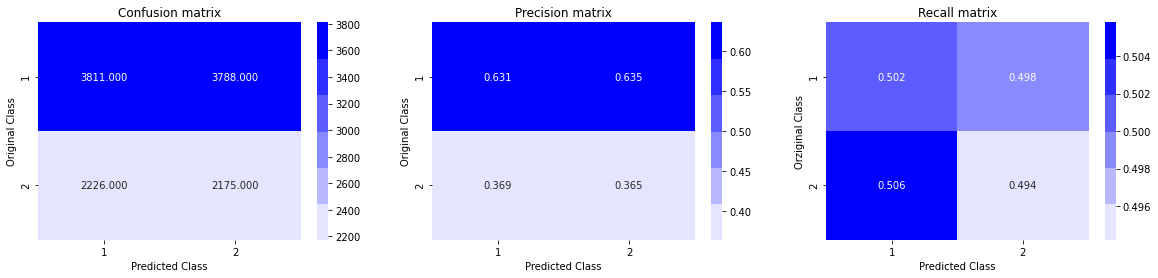

In [ ]:
#We are predicting data randomly without any model...

#rand_probs = np.random.rand(1,2)
#print(rand_probs)
#result = ((rand_probs/sum(sum(rand_probs)))[0])
#print(result)
#Output: [[0.4575463  0.48507075]]
#Output: [0.48539998 0.51460002]

predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.6572032921579021
For values of alpha =  0.0001 The log loss is: 0.46439146092039724
For values of alpha =  0.001 The log loss is: 0.46284943813940943
For values of alpha =  0.01 The log loss is: 0.4724737567288684
For values of alpha =  0.1 The log loss is: 0.46287929645470915
For values of alpha =  1 The log loss is: 0.4724503999005227
For values of alpha =  10 The log loss is: 0.5230707530597059


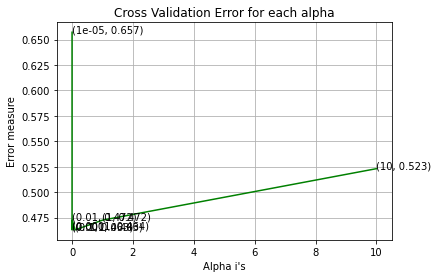

For values of best alpha =  0.001 The train log loss is: 0.46060161574075015
For values of best alpha =  0.001 The test log loss is: 0.46284943813940943
Total number of data points : 12000


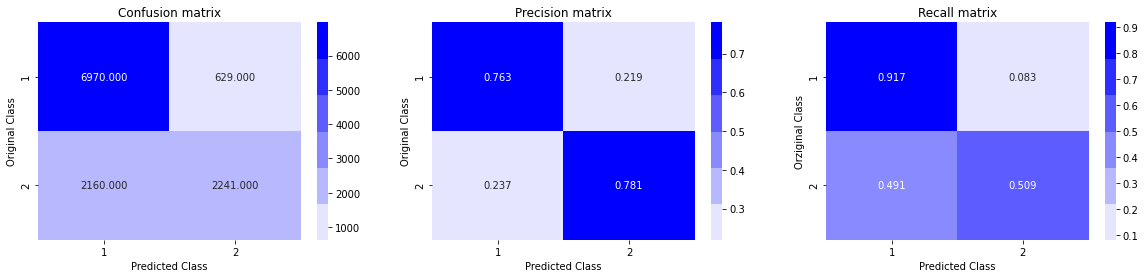

In [ ]:
#Logistic regression model... #Because SGDClassifier(loss = 'log')


alpha = [10 ** x for x in range(-5, 2)]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
#SVM model..Because(loss = 'hinge')

alpha = [10 ** x for x in range(-5, 2)]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
    
# np.round(16.05456, 2)
# Output: 16.05

# x = ('apple', 'banana', 'cherry')
# y = enumerate(x)
# Output: [(0, 'apple'), (1, 'banana'), (2, 'cherry')]

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

NameError: ignored

[0]	train-logloss:0.684826	valid-logloss:0.684744
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.613911	valid-logloss:0.614097
[20]	train-logloss:0.562247	valid-logloss:0.562824
[30]	train-logloss:0.523262	valid-logloss:0.524281
[40]	train-logloss:0.493429	valid-logloss:0.494871
[50]	train-logloss:0.469923	valid-logloss:0.471842
[60]	train-logloss:0.451263	valid-logloss:0.453464
[70]	train-logloss:0.436442	valid-logloss:0.438984
[80]	train-logloss:0.424166	valid-logloss:0.427158
[90]	train-logloss:0.414295	valid-logloss:0.417724
[100]	train-logloss:0.40621	valid-logloss:0.40996
[110]	train-logloss:0.39932	valid-logloss:0.403528
[120]	train-logloss:0.393435	valid-logloss:0.3981
[130]	train-logloss:0.388353	valid-logloss:0.393521
[140]	train-logloss:0.384204	valid-logloss:0.38995
[150]	train-logloss:0.380492	valid-logloss:0.386926
[160]	train-logloss:0.377199	valid

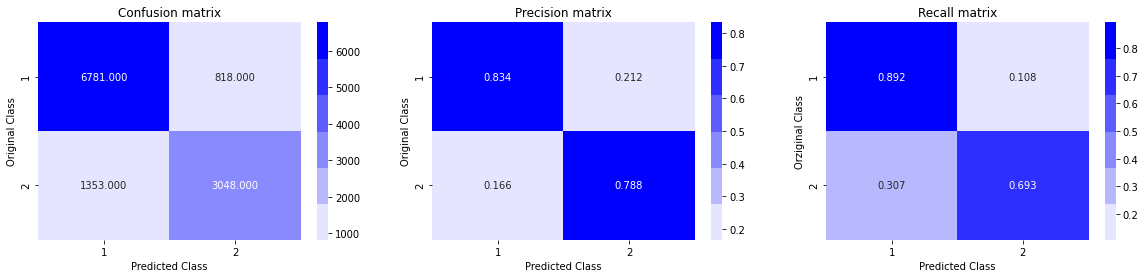

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)
print(predicted_y)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
alamin = pd.read_csv('/content/drive/My Drive/Machine Learning/Real World Problem-1/final_features.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

yasin = alamin[0:5000]
X = MinMaxScaler().fit_transform(yasin[['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y']])
y = yasin['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.129s...
[t-SNE] Computed neighbors for 5000 samples in 12.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.383643
[t-SNE] Computed conditional probabilities in 0.263s
[t-SNE] Iteration 50: error = 84.0361481, gradient norm = 0.0622105 (50 iterations in 2.814s)
[t-SNE] Iteration 100: error = 70.9390945, gradient norm = 0.0128406 (50 iterations in 2.140s)
[t-SNE] Iteration 150: error = 69.4649048, gradient norm = 0.0103208 (50 iterations in 1.969s)
[t-SNE] Iteration 200: error = 68.8560257, gradient norm = 0.0084249 (50 iterations in 1.919s)
[t-SNE] Iteration 250: error = 68.5160675, gradient norm = 0.006213

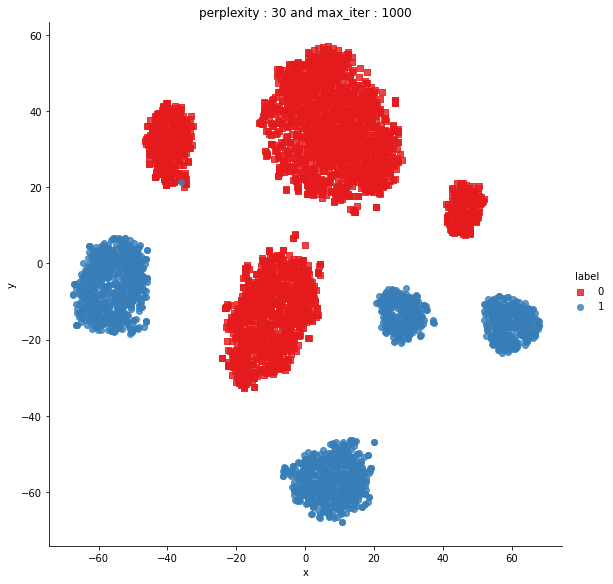

In [ ]:
munna = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

sns.lmplot(data=munna, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()